<a href="https://colab.research.google.com/github/kshitijzutshi/Teleco-Customer-Churn-Prediction/blob/main/Predicting_Customer_Churn_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract


### 1. Initializing required libraries for data manupilation/data processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Reading the Dataset : Using Pandas to read CSV file

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Get an overview of the dataset by looking at head -> Gives the first 5 rows of data

data_top = data.head() 
    
# display 
data_top 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for null values
data.isna().any(axis=0).any()

False

In [5]:
# Checking number of unique values in each column
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### 3. Data Cleaning - Cleaning the dataset to remove insignificant data

In order to do data cleaning we need to select the significant independent variables in out dataset and filter out the insignificant independent variables/features.

Looking at the predictor variables in the dataset - 

**customerID**    - This predictor variable is not dependendent on any other variable       
**gender**              
**SeniorCitizen**     
**Partner**           
**Dependents**       
**tenure**         
**PhoneService**     
**MultipleLines**    
**InternetService**   
**OnlineSecurity**    
**OnlineBackup**      
**DeviceProtection**  
**TechSupport**       
**StreamingTV**       
**StreamingMovies**  
**Contract**          
**PaperlessBilling**  
**PaymentMethod**     
**MonthlyCharges**    
**TotalCharges**   - This predictor variable is not dependendent on any other variable     as it can be approximated as the function of tenure and monthy charges.   

**Target**:

Churn - Whether the customer churned or not(Yes,No)

**Numeric Features:**

• Tenure — Number of months the customer has been with the company

• MonthlyCharges — The monthly amount charged to the customer

• TotalCharges — The total amount charged to the customer

**Categorical Features:**

• CustomerID

• Gender — M/F

• SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)

• Partner — Whether customer has a partner or not (Yes, No)

• Dependents — Whether customer has dependents or not (Yes, No)

• PhoneService — Whether the customer has a phone service or not (Yes,
No)

• MulitpleLines — Whether the customer has multiple lines or not (Yes,
No, No Phone Service)

• InternetService — Customer’s internet service type (DSL, Fiber Optic,
None)

• OnlineSecurity — Whether the customer has Online Security add-on
(Yes, No, No Internet Service)

• OnlineBackup — Whether the customer has Online Backup add-on (Yes,
No, No Internet Service)

• DeviceProtection — Whether the customer has Device Protection add-on
(Yes, No, No Internet Service)

• TechSupport — Whether the customer has Tech Support add-on (Yes,
No, No Internet Service)

• StreamingTV — Whether the customer has streaming TV or not (Yes,
No, No Internet Service)

• StreamingMovies — Whether the customer has streaming movies or not
(Yes, No, No Internet Service)

• Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)

• PaperlessBilling — Whether the customer has paperless billing or not
(Yes, No)

• PaymentMethod — The customer’s payment method (E-Check, Mailed
Check, Bank Transfer (Auto), Credit Card (Auto))

### 4. Visualization and Plots

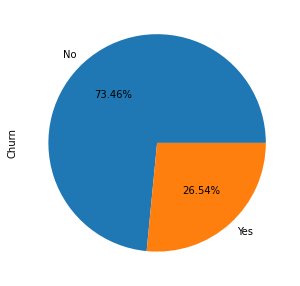

In [6]:
# Inspecting the Dataset
# The pie plot is for getting an overview of total number of churned/not churned customers
# The autopct set at 2 decimal to get a precise idea of the segregation of target values.
plot = data.Churn.value_counts().plot.pie(y='Churn', figsize=(5, 5), autopct='%.2f%%')

In [7]:
# In order to get overview of the coloumn name, null values, count and data types of predictor variables
# in the dataset.
data.info()
# describe function is used to get insightful statistics like mean, standard deviation
# count, min, max and percentile values of the data. 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Interpreting the pair plots** - In order to visualize the relationship between data, seaborn's pairplot functionality has been used. 



1.   The diagonal axis is the histogram for the particular variable plotted against the number of occurrences.
2.   The bottom left and bottom right plots capture the same information, except the axis is flipped.



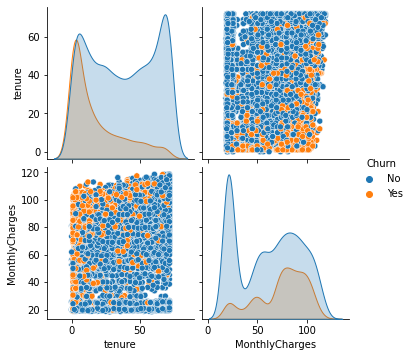

In [8]:
 # pairplot plots pairwise relationships in the data, hue is the name of the target variable in the data.
 # reference - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data[['Churn', 'tenure', 'MonthlyCharges']], hue="Churn")

Inference from the above pair-plots -


*   The diagonal plots top-left and bottom-right give the **marginal distribution of data**. ie., Considering just the **monthly charges** as a variable we see that for lower monthly charges the churn is less and higher for the contrary. Now, considering just the **tenure** as the variable, we see that distribution of churned clients is uniform, whereas for non-churned client is right-skewed.
*   The bottom-left and top-right plots state a common fact - customers with **less tenure** with the company and **higher monthly charges** have **churned**!

This will be further understood by a box plot of the same.

**Note :** 

*Customers with contract of month-to-month churned more, as they are not bound by staying with the company.*


**Interpreting Box plot-**



*   The first box plot is comparing the tenure quartiles between the two groups. What we can see is that - median tenure for churned customers is a lot shorter than unchurned customers. Approx. 75% of the customers end up leaving the Telco within first 30 months of joining.
*   The second box compares the monthly charges vs churn. The median monthly charges of churned customers is significantly higher than those who didn't churn. 

Further cementing the fact that in order to retain customers offers, promotions and perks are necessary.



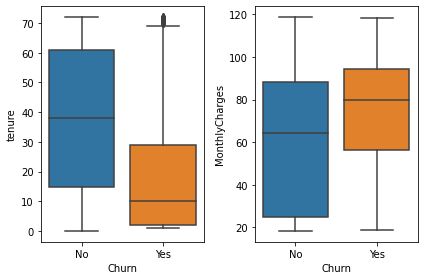

In [9]:
# To organize our plots and keep them in the same figure
# reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axs = plt.subplots(ncols=2)
# First box plot of tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=data, ax=axs[0])
# Second box plot for monthly charges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axs[1])

# this prevents plots from overlapping
plt.tight_layout()

**Demographic Variables:**

From the dataset we can also examine the categorical variables, starting with demographic variables like - Gender, SeniorCitizen, Partner, Dependents. 



In [10]:
# Code courtesy - https://gist.github.com/edwardcqian/359b0a4447ab9121e4dc08663bbd0df4#file-cp6-py
# reference - https://seaborn.pydata.org/generated/seaborn.countplot.html
'''
this snippet of code helps organize our plots and keep them in the same figure
columns: List[str] - each column is its own chart
title: str - title is used as the title of each chart
function only works for 3 or more columns
'''
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(15, 15)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=data, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  # this prevents plots from overlapping
  plt.tight_layout()

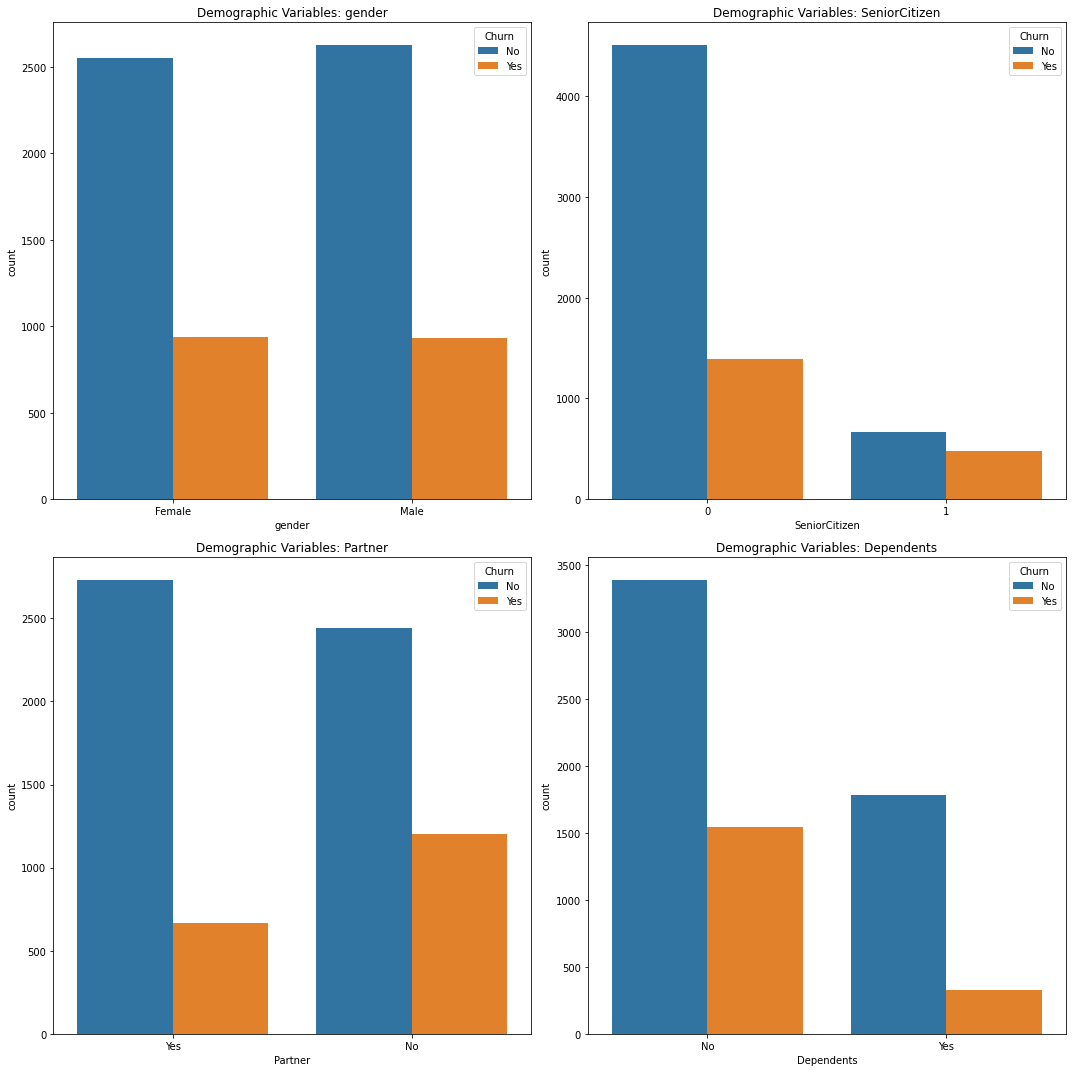

In [11]:
# plot demographic features
plot_categoricals(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Variables')

**Inferring the demographic plot-**



*   For the top-left plot of count vs gender in analysis of churn, there is very **little** difference in churn propotions between males and females.
*   There is a **higher** proportion of churn amongst senior citizens(top-right chart), customers with no partners(bottom-left chart) and customers with no dependents(bottom-right chart).

**Note:** 

*What is particularly insightful is that non-senior citizens with no partners and no dependents are an intersection of customers that indicate less frequent churn and speaks positively towards customer retention for the Telco.*


**Other Categorical Variables -**

The other categorical variables can be divided between service and billing
information.